This analysis is for classification of  APS failure. The null values in the train and test data are imputed with k neighbors.  

https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc , roc_curve , precision_recall_curve, f1_score, average_precision_score
from sklearn.model_selection import cross_val_predict, cross_val_score , train_test_split, cross_validate, StratifiedKFold, GridSearchCV, KFold


In [5]:
from sklearn.feature_selection import RFE

In [6]:
import graphviz 
import sklearn.tree as tree

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [8]:
## Read in the train data sets 
train_data_3 = pd.read_csv("train_data_3.csv")


In [9]:
## Read in the test data sets 
test_data_3 = pd.read_csv("test_data_3.csv")


In [10]:
train_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   60000 non-null  object 
 1   ag_003  60000 non-null  float64
 2   ag_004  60000 non-null  float64
 3   ag_005  60000 non-null  float64
 4   ag_006  60000 non-null  float64
 5   ag_007  60000 non-null  float64
 6   ah_000  60000 non-null  float64
 7   al_000  60000 non-null  float64
 8   ap_000  60000 non-null  float64
 9   ay_001  60000 non-null  float64
 10  ay_005  60000 non-null  float64
 11  ay_006  60000 non-null  float64
 12  ay_007  60000 non-null  float64
 13  ay_008  60000 non-null  float64
 14  az_003  60000 non-null  float64
 15  az_004  60000 non-null  float64
 16  az_005  60000 non-null  float64
 17  az_006  60000 non-null  float64
 18  ba_000  60000 non-null  float64
 19  ba_006  60000 non-null  float64
 20  ba_007  60000 non-null  float64
 21  cj_000  60000 non-null  float64
 22

In [11]:
test_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22

In [11]:
def perform_classification(model , X_train,X_test,y_train,y_test, classifier):
    
    model = model.fit(X_train,y_train)
    
    print("\n Train Score : " + str(model.score(X_train,y_train)))
    train_pred = model.predict(X_train)

    accuracy = np.mean(y_train == train_pred)
    print("Train Accuracy using predicted labels :" + str(accuracy))


    test_pred = model.predict(X_test)

    print("Test set score using predicted labels: {:.2f}".format(np.mean(test_pred == y_test)))

    print("Calculated Test set score: {:.2f}".format(model.score(X_test,y_test)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_test,test_pred)))

    print("Confusion matrix with the predicted class  :\n{}".format(confusion_matrix(y_test,test_pred)))
    
    if classifier == 'dt':
            print("\n Max depth:{} ".format(model.tree_.max_depth))
        
    
    ## Calculate the AUC and plot the ROC curve.
    test_prob = model.predict_proba(X_test)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    #plt.scatter(fpr[ix1], tpr[ix1], marker='o', color='black', label='Best')
    plt.show()
    
    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    ####
    # convert to f score
    #fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest recall 
    #ix = np.argmax(recall)
    #best_threshold = pr_thresholds[ix]
    #print('Best Threshold for PR curve =%f, Recall=%.3f' % (pr_thresholds[ix], recall[ix]))
    ####
    
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    def cal_opt_class(val, threshold):
        return (val >= threshold).astype('int')
    
    #opt_class = pd.Series(preds).apply(lambda x: cal_opt_class(x,best_threshold))
    
    #print("Confusion matrix with opt threshold:\n{}".format(confusion_matrix(y_test,opt_class)))
    
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    # define thresholds
    #thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    #scores = [f1_score(y_test, to_labels(preds, t)) for t in thresholds]
    # get best threshold
    #ix = np.argmax(scores)
    #print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    #p_class = to_labels(preds , thresholds[ix])
    #print("Confusion matrix with opt threshold search :\n{}".format(confusion_matrix(y_test,p_class)))
    
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : y_test , "pred_class" : test_pred})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]
    
    total_cost = fp*10 + fn*500
    
    print("Total_cost of mis- classification : {}".format(total_cost))
    
    ## Plot Variable importance for decision tree , random forest
    if (classifier == 'dt') | (classifier == 'rf') | (classifier == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,5))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)


In [12]:
cols = train_data_3.columns.tolist()
cont_features = cols[1:]

In [13]:
train_data_3['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [14]:
def make_numeric(val):
    if val == 'neg':
        return 0
    else:
        return 1
train_data_3['label'] = train_data_3['class'].apply(lambda x: make_numeric(x))

In [15]:
train_data_3['label'].value_counts()

0    59000
1     1000
Name: label, dtype: int64

In [16]:
test_data_3['label'] = test_data_3['class'].apply(lambda x: make_numeric(x))

In [17]:
test_data_3['label'].value_counts()

0    15625
1      375
Name: label, dtype: int64

In [18]:
def feature_selection(model, data , cont_features):
    """
    for the given model , data and features, select the best features with RFE.
    """
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[cont_features] = scaler.fit_transform(data1[cont_features])
    ##
    predictors = data1[cont_features]
    ##
    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_validate : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_validate : {}".format(y_validate.shape))
    ##
    rfe = RFE(model, n_features_to_select = 10)
    fit = rfe.fit(X_train, y_train)
    # report selected features
    names = X_train.columns
    print('Selected Features:\n')
    for i in range(len(fit.support_)):
        if fit.support_[i]:
            print(names[i])
    ##
    # plot feature rank

    ticks = [i for i in range(len(names))]
    selected_ranking = []
    selected_ticks = []
    ranking = list(fit.ranking_)
    for i in range(len(names)):
        if (ranking[i] == 1) | (ranking[i] == 2 | (ranking[i] ==3)):
            selected_ranking.append(ranking[i])
            selected_ticks.append(list(names)[i])
        
    plt.figure(figsize = (15,5))
    plt.bar(selected_ticks, selected_ranking)
    plt.xticks(selected_ticks, rotation = 90)
    plt.ylabel("Rankings")
    plt.title("First 3 ranks")
    plt.show()
    
    return

In [19]:
def parameter_tuning(model, param_grid, data , n_features):
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    X_train, X_validate, y_train, y_validate  = train_test_split(predictors, data1['label'] , random_state = 1 , test_size = 0.2, stratify = data1['label'])

    print("\n X_train : {}".format(X_train.shape))
    print("\n X_test : {}".format(X_validate.shape))
    print("\n y_train : {}".format(y_train.shape))
    print("\n y_test : {}".format(y_validate.shape))

    cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 12)
    
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring = 'f1')
    grid_search.fit(X_train, y_train)
    #
    print(grid_search.best_params_)
    #
    model_best = grid_search.best_estimator_
    model_predictions = model_best.predict(X_validate)
    #
    print("Test set score using predicted labels: {:.2f}".format(np.mean(model_predictions == y_validate)))

    print("Calculated Test set score: {:.2f}".format(model_best.score(X_validate,y_validate)))

    print("Accuracy score :{:.3f}".format(accuracy_score(y_validate,model_predictions)))

    print("Confusion matrix :\n{}".format(confusion_matrix(y_validate,model_predictions)))

    ## Calculate the AUC and plot the ROC curve.
    test_prob = model_best.predict_proba(X_validate)
    preds = test_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_validate, preds)
    roc_auc = auc(fpr, tpr)
    
    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    ##Calculate AUC and plot precision recall curve.
    precision, recall, thresholds = precision_recall_curve(y_validate, preds)
    pr_auc = auc(recall, precision)
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
    return
    

In [20]:
def cross_validation(model, data , n_features ):
    
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 33)
    ## scale the continous variables.
    scaler = StandardScaler()
    ## make a copy of train
    data1 = data.copy()
    data1[n_features] = scaler.fit_transform(data1[n_features])
    ##
    predictors = data1[n_features]

    ##
    scores = cross_val_score(model , predictors , data1['label'], cv = cv,scoring = 'f1' )
    print(scores)
    print("\n Avg AUC score for PR curve:{}".format(scores.mean()))

    ## predict class
    pred_class = cross_val_predict(model, predictors , data1['label'], cv = cv )

    ##predict probability values
    predicted = cross_val_predict(model, predictors, data1['label'], cv = cv, method = 'predict_proba' )
    print("Confusion matrix :\n{}".format(confusion_matrix(data1['label'],pred_class)))

    ##calculate roc auc
    fpr, tpr, thresholds = roc_curve(data1['label'], predicted[:,1])
    roc_auc = auc(fpr, tpr)
    ##

    ##Calculate AUC and plot precision recall curve.
    precision, recall, pr_thresholds = precision_recall_curve(data1['label'], predicted[:,1])
    pr_auc = auc(recall, precision)
    ## Calculate the total cost 
    
    df = pd.DataFrame({"y_test" : data1['label'] , "pred_class" : pred_class})
    fp = df[(df['y_test'] ==0) & (df['pred_class'] ==1)].shape[0]
    fn = df[(df['y_test'] ==1) & (df['pred_class'] ==0)].shape[0]    
    total_cost = fp*10 + fn*500    
    print("Total_cost of mis- classification : {}".format(total_cost))

    ## Plot ROC curve.
    plt.figure(figsize = (8,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    ## Plot PR curve.
    plt.title('PR Curve')
    plt.plot( recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()

    return


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
ag_006
ah_000
ay_006
ay_007
ck_000
cn_002
cn_006
ee_005
ee_007


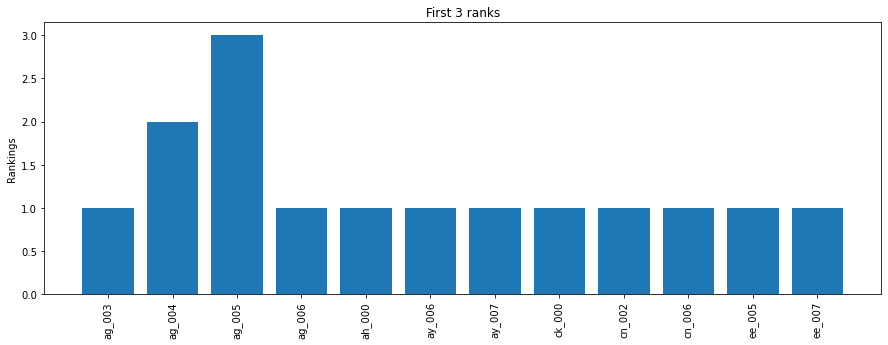

In [25]:
model = LogisticRegression(solver='liblinear')
feature_selection(model , train_data_3 , cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9696041666666667
Train Accuracy using predicted labels :0.9696041666666667
Test set score using predicted labels: 0.97
Calculated Test set score: 0.97
Accuracy score :0.965
Confusion matrix with the predicted class  :
[[11400   400]
 [   19   181]]


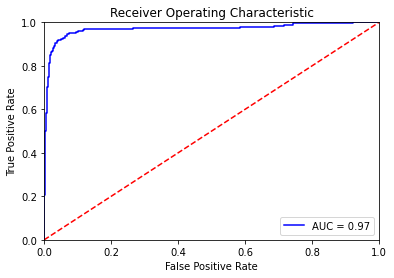

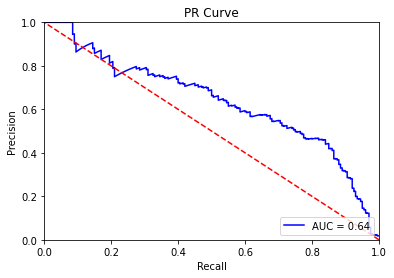

Total_cost of mis- classification : 13500


In [26]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


lg = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_train, X_validate, y_train, y_validate , 'lg')

Check for different class weights 


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.2, 1: 0.8}}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.986
Confusion matrix :
[[11687   113]
 [   59   141]]


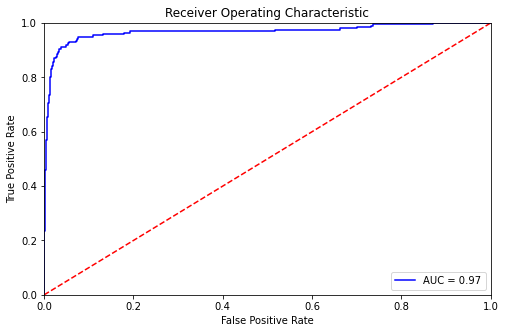

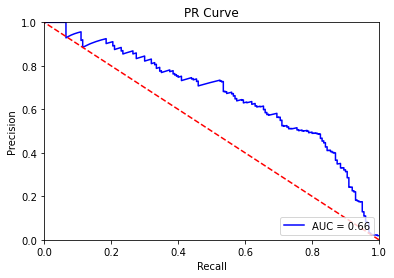

In [27]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

lg = LogisticRegression(random_state = 111, solver = 'liblinear')
param_grid = {
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}],
            }
parameter_tuning(model =lg, param_grid = param_grid, data = train_data_3 , n_features = n_features)

With the selected class weight:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9869375
Train Accuracy using predicted labels :0.9869375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.986
Confusion matrix with the predicted class  :
[[11687   113]
 [   59   141]]


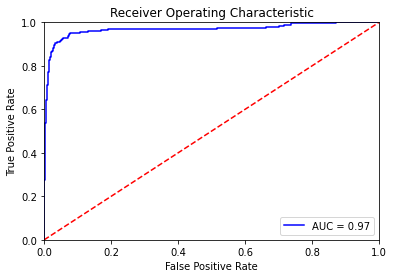

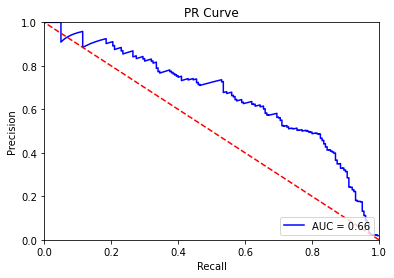

Total_cost of mis- classification : 30630


In [28]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


lg = LogisticRegression(class_weight = {0:0.2 , 1:0.8}, solver = 'liblinear', penalty = 'l1')
perform_classification(lg , X_train, X_validate, y_train, y_validate , 'lg')

Total cost of mis-classification is more with weights 0.4:0.6 , than 'balanced' weights.  

Cross Validate :

[0.47959184 0.47483871 0.51339915 0.49717514 0.49180328]

 Avg AUC score for PR curve:0.4913616240162469
Confusion matrix :
[[57202  1798]
 [   90   910]]
Total_cost of mis- classification : 62980


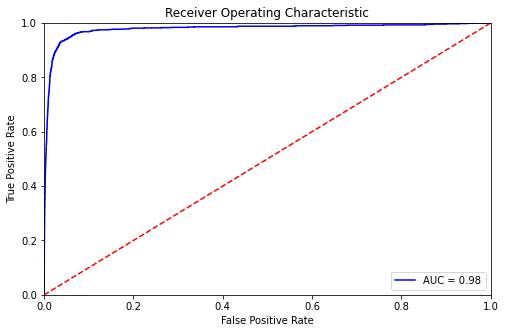

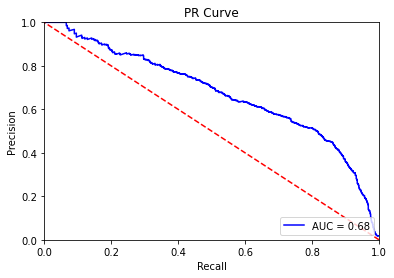

In [29]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_3 , n_features=n_features )


With weights 0.4:0.6 : 

[0.64125561 0.62068966 0.65876777 0.63513514 0.62068966]

 Avg AUC score for PR curve:0.6353075646745954
Confusion matrix :
[[58511   489]
 [  307   693]]
Total_cost of mis- classification : 158390


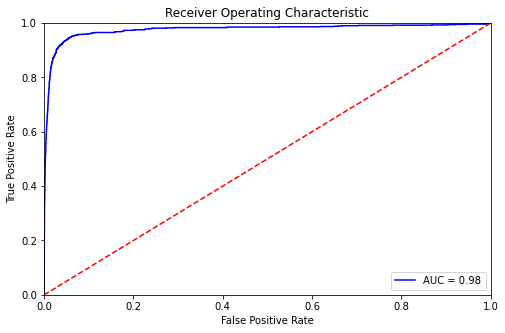

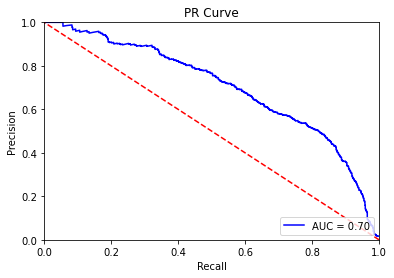

In [30]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

lg = LogisticRegression(class_weight = {0:0.2,1:0.8}, random_state = 12 , solver = 'liblinear')
cross_validation(model=lg, data= train_data_3 , n_features=n_features )

Test the model with 'balanced' weights in test data:

In [31]:
test_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   16000 non-null  object 
 1   ag_003  16000 non-null  float64
 2   ag_004  16000 non-null  float64
 3   ag_005  16000 non-null  float64
 4   ag_006  16000 non-null  float64
 5   ag_007  16000 non-null  float64
 6   ah_000  16000 non-null  float64
 7   al_000  16000 non-null  float64
 8   ap_000  16000 non-null  float64
 9   ay_001  16000 non-null  float64
 10  ay_005  16000 non-null  float64
 11  ay_006  16000 non-null  float64
 12  ay_007  16000 non-null  float64
 13  ay_008  16000 non-null  float64
 14  az_003  16000 non-null  float64
 15  az_004  16000 non-null  float64
 16  az_005  16000 non-null  float64
 17  az_006  16000 non-null  float64
 18  ba_000  16000 non-null  float64
 19  ba_006  16000 non-null  float64
 20  ba_007  16000 non-null  float64
 21  cj_000  16000 non-null  float64
 22


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9696041666666667
Train Accuracy using predicted labels :0.9696041666666667
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.975
Confusion matrix with the predicted class  :
[[15272   353]
 [   40   335]]


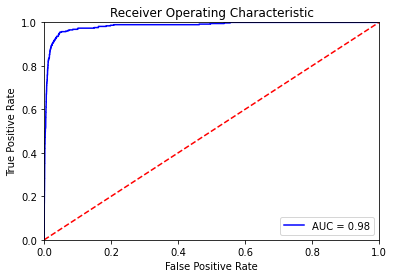

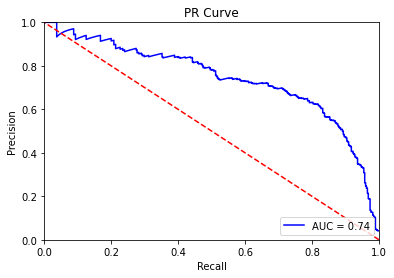

Total_cost of mis- classification : 23530


In [33]:
n_features = ['ag_006','ag_003','ag_004','ag_005', 'ah_000','ay_006','ay_007','ck_000','cn_002','cn_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


lg = LogisticRegression(class_weight = 'balanced', random_state = 12 , solver = 'liblinear')
perform_classification(lg , X_train, X_test, y_train, y_test , 'lg')


In [22]:
## save the results 
classifier = []
cost = []
auc_val = []
##
classifier.append('log_reg')
cost.append(23530)
auc_val.append(0.74)

##### Decision Trees Classifier: 


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ah_000
al_000
ap_000
ay_008
az_004
ck_000
cn_003
cn_006
cs_002
ee_007


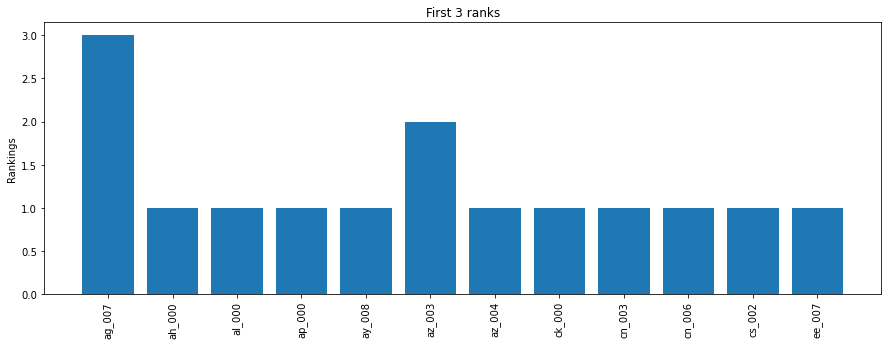

In [35]:
dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
feature_selection(dt, train_data_3, cont_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999583333333333
Train Accuracy using predicted labels :0.9999583333333333
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.987
Confusion matrix with the predicted class  :
[[11715    85]
 [   73   127]]

 Max depth:46 


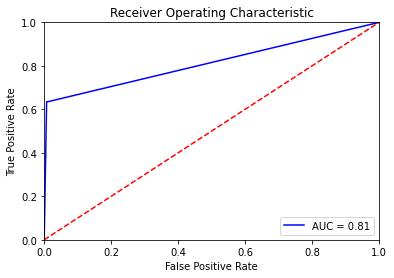

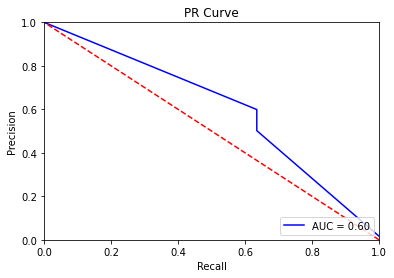

Total_cost of mis- classification : 37350


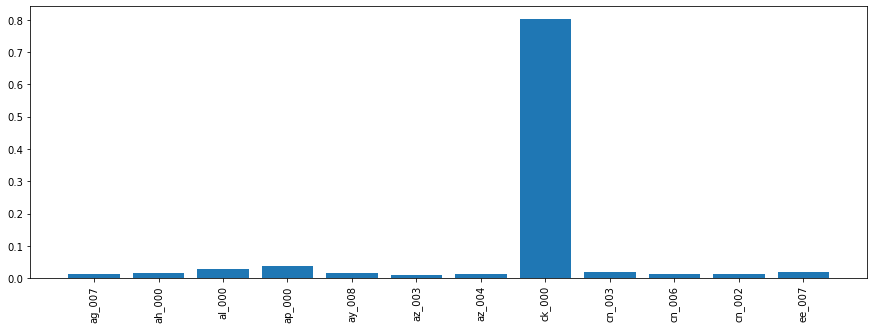

In [36]:
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'max_depth': 25, 'min_samples_split': 2}
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.982
Confusion matrix :
[[11649   151]
 [   60   140]]


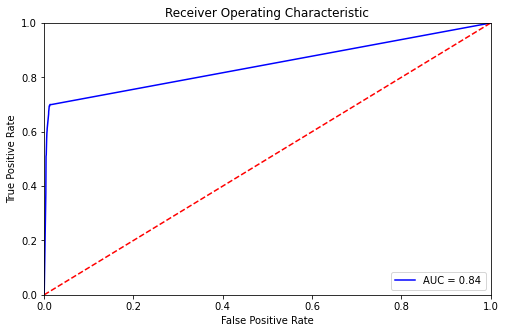

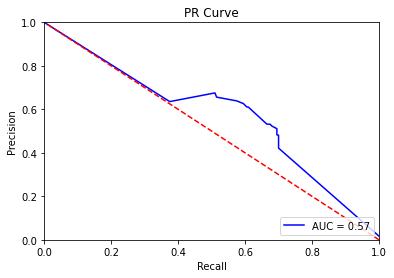

In [37]:
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']

dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced')
param_grid = {
    "max_depth" : [5,10,15,20,25],
    "min_samples_split" : [2,5]
}
parameter_tuning(model=dt, param_grid=param_grid, data=train_data_3 , n_features=n_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9941666666666666
Train Accuracy using predicted labels :0.9941666666666666
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.982
Confusion matrix with the predicted class  :
[[11649   151]
 [   60   140]]

 Max depth:25 


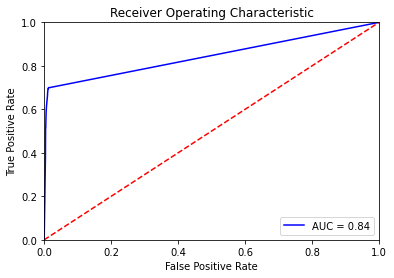

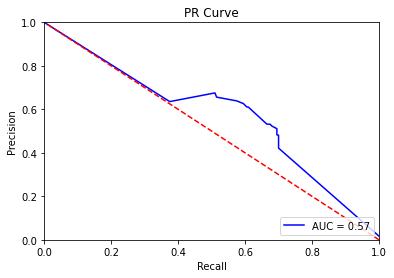

Total_cost of mis- classification : 31510


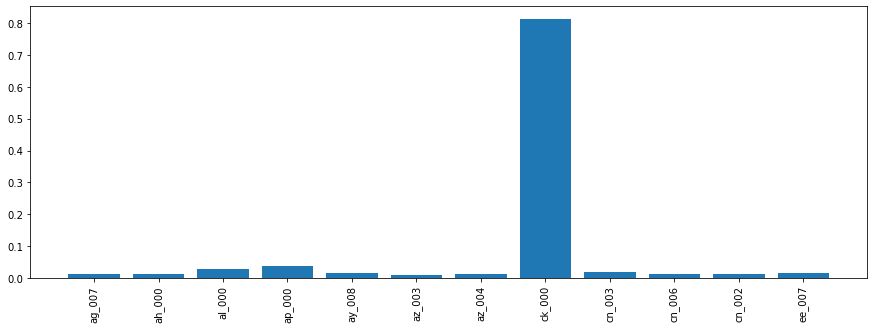

In [38]:
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25)
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.4, 1: 0.6}, 'max_depth': 10, 'min_samples_split': 2}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix :
[[11728    72]
 [   71   129]]


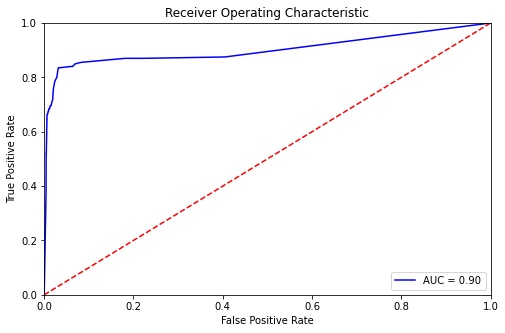

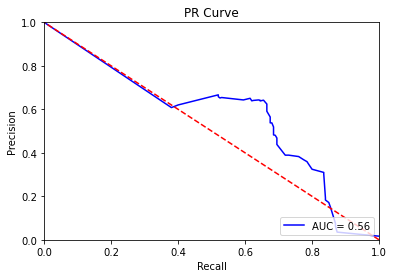

In [39]:
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']

dt = DecisionTreeClassifier(random_state = 14 )
param_grid = {
    "max_depth" : [5,10,15,20,25],
    "min_samples_split" : [2,5],
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}]
}
parameter_tuning(model=dt, param_grid=param_grid, data=train_data_3 , n_features=n_features)


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9967291666666667
Train Accuracy using predicted labels :0.9967291666666667
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.988
Confusion matrix with the predicted class  :
[[11728    72]
 [   71   129]]

 Max depth:10 


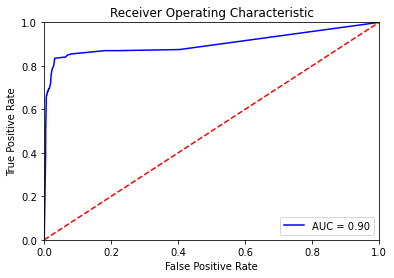

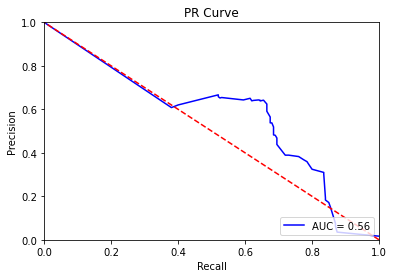

Total_cost of mis- classification : 36220


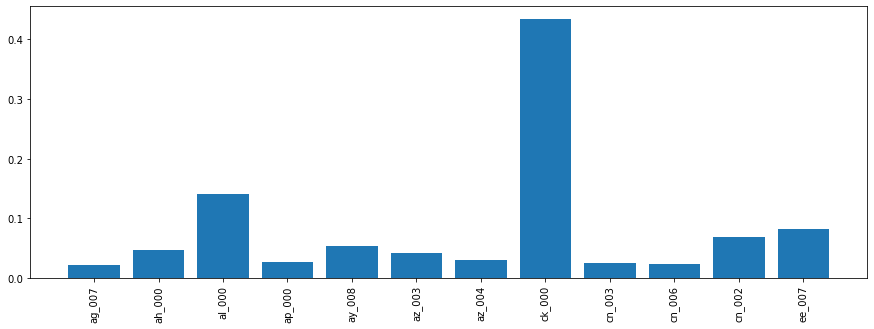

In [40]:
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']


## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


dt = DecisionTreeClassifier(random_state = 14 , class_weight = {0:0.4 ,1:0.6 } , max_depth = 10)
perform_classification(dt , X_train, X_validate, y_train, y_validate , 'dt')

[0.60550459 0.56740443 0.61261261 0.61674009 0.59584296]

 Avg AUC score for PR curve:0.5996209341107501
Confusion matrix :
[[58414   586]
 [  322   678]]
Total_cost of mis- classification : 166860


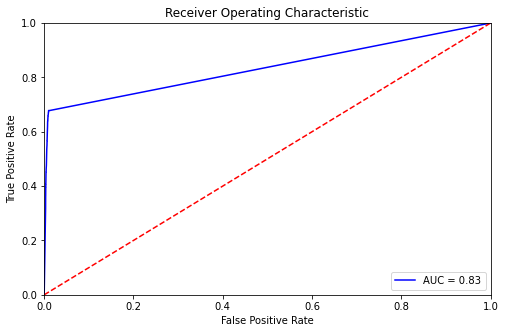

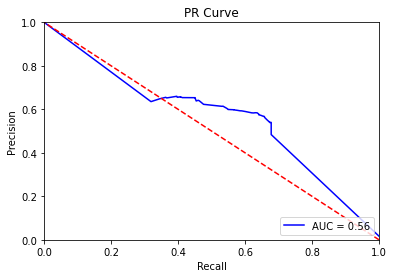

In [41]:
dt = DecisionTreeClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25)
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']
cross_validation(model=dt, data= train_data_3 , n_features= n_features )

[0.64324324 0.67619048 0.62155388 0.605      0.64498645]

 Avg AUC score for PR curve:0.6381948108019995
Confusion matrix :
[[58667   333]
 [  375   625]]
Total_cost of mis- classification : 190830


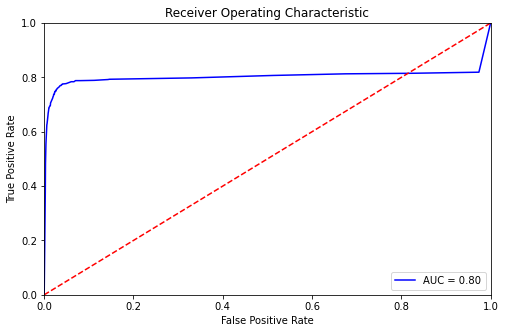

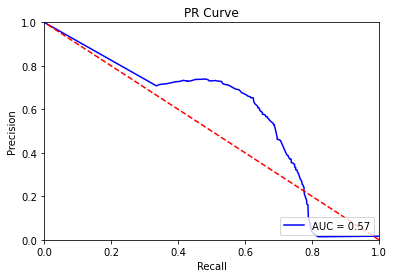

In [42]:
dt = DecisionTreeClassifier(random_state = 14 ,  class_weight = {0:0.4 ,1:0.6 } , max_depth = 10)
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']
cross_validation(model=dt, data= train_data_3 , n_features= n_features )


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9941666666666666
Train Accuracy using predicted labels :0.9941666666666666
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.980
Confusion matrix with the predicted class  :
[[15424   201]
 [  126   249]]

 Max depth:25 


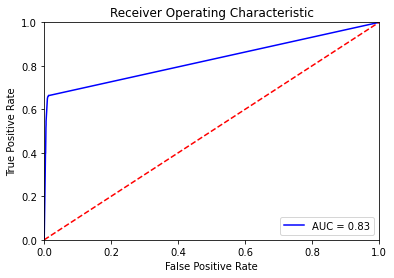

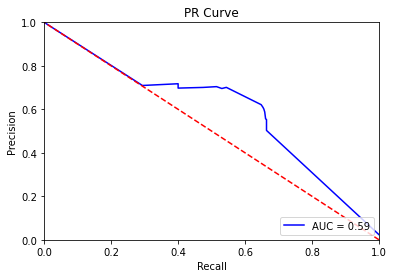

Total_cost of mis- classification : 65010


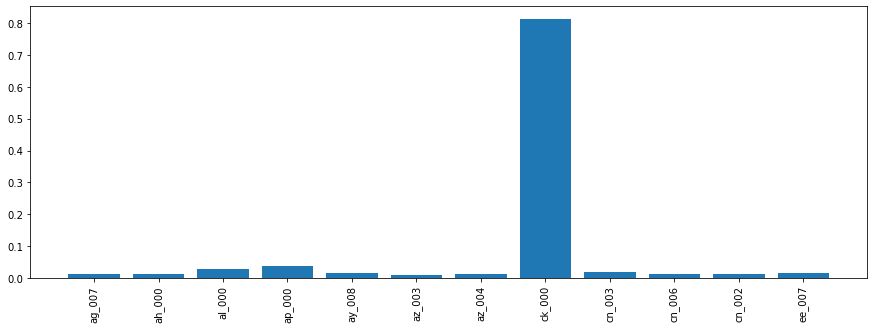

In [43]:
## Check the performance of the model on test data 
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


dt = DecisionTreeClassifier(class_weight = 'balanced', random_state = 14, max_depth = 25)
perform_classification(dt , X_train, X_test, y_train, y_test , 'dt')



 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.982
Confusion matrix with the predicted class  :
[[15492   133]
 [  152   223]]

 Max depth:20 


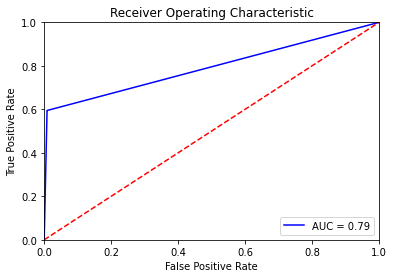

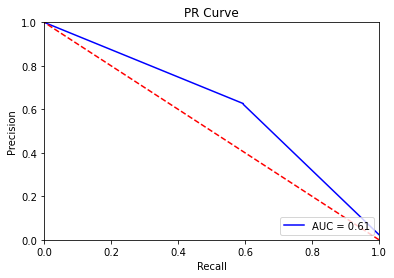

Total_cost of mis- classification : 77330


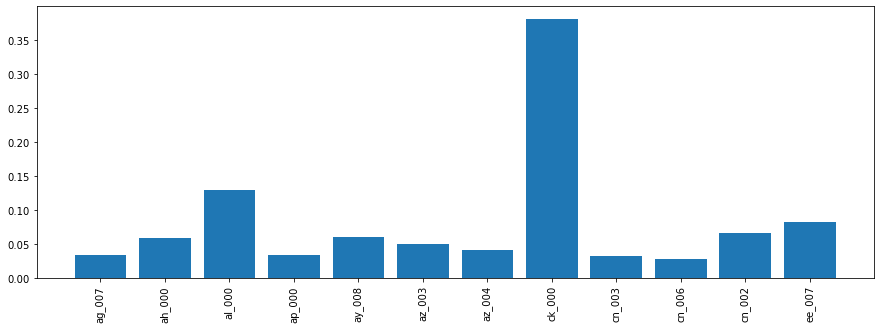

In [44]:
## Check the performance of the model on test data 
n_features = ['ag_007','ah_000','al_000','ap_000', 'ay_008','az_003','az_004','ck_000','cn_003','cn_006','cn_002','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


dt = DecisionTreeClassifier(class_weight = {0:0.4,1:0.6}, random_state = 14, max_depth = 20)
perform_classification(dt , X_train, X_test, y_train, y_test , 'dt')


In [23]:
## save the results 
classifier.append('decision_trees')
cost.append(65010)
auc_val.append(0.59)

##### Random Forest Classifier


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_005
ah_000
al_000
ap_000
ay_008
ba_000
ck_000
cn_003
cs_002
cs_004


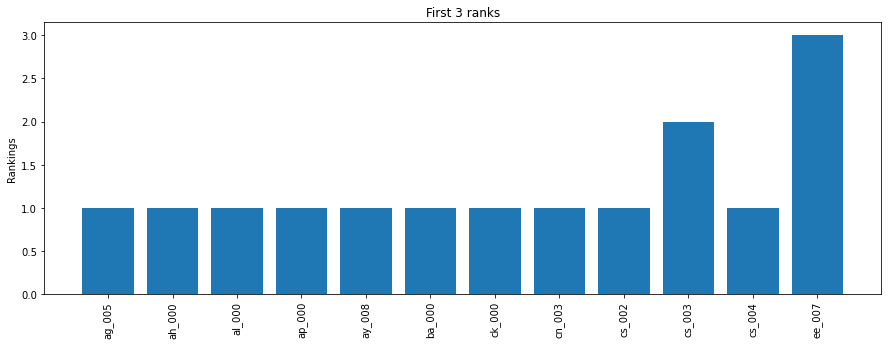

In [25]:
rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
feature_selection(model = rf, data = train_data_3, cont_features = cont_features)

Perform Random Forest Classification with the selected features:  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999583333333333
Train Accuracy using predicted labels :0.9999583333333333
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11784    16]
 [   89   111]]


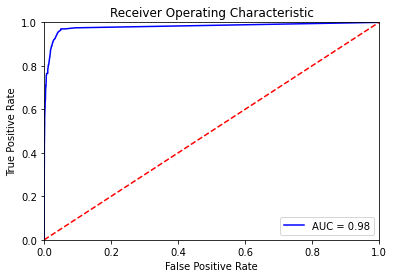

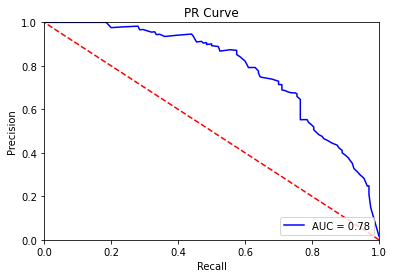

Total_cost of mis- classification : 44660


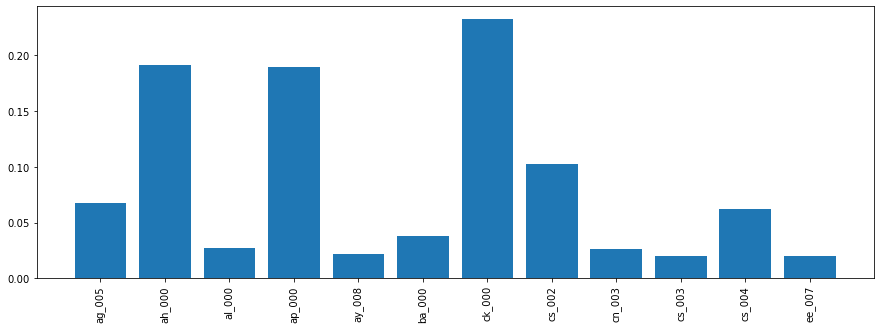

In [26]:
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Gridsearch Random Forest hyper parameters:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 500}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix :
[[11723    77]
 [   61   139]]


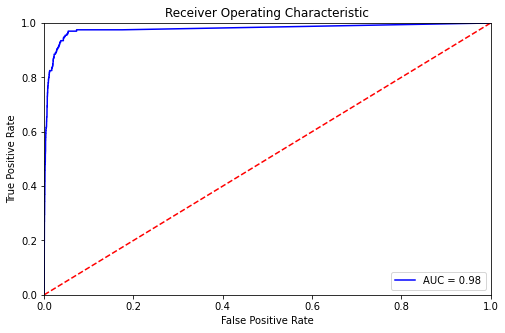

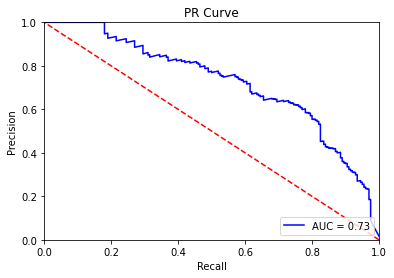

In [27]:
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced')
param_grid = {
    "max_depth" : [15,20,25],
    "min_samples_split" : [2,5],
    "n_estimators" : [500,900]
}
parameter_tuning(model=rf, param_grid=param_grid, data=train_data_3 , n_features=n_features)

Perform Random Forest Classification with the selected features and parameters :  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9970416666666667
Train Accuracy using predicted labels :0.9970416666666667
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix with the predicted class  :
[[11723    77]
 [   61   139]]


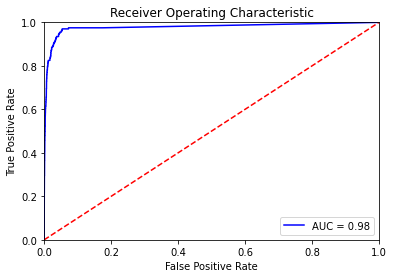

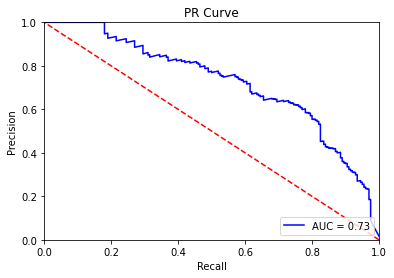

Total_cost of mis- classification : 31270


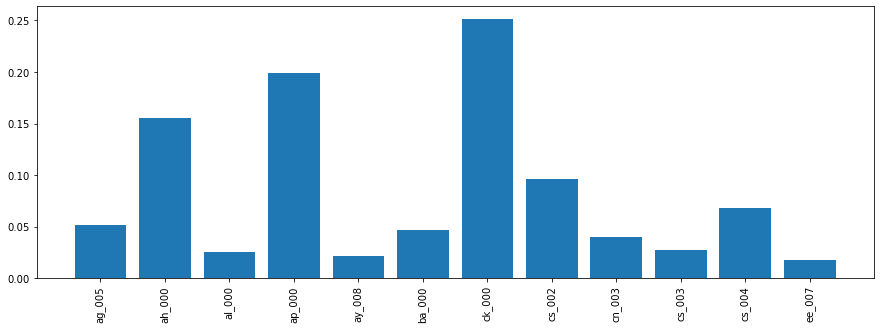

In [29]:
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25, min_samples_split = 5,n_estimators = 500 )
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Grid search with class weights :  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'class_weight': {0: 0.4, 1: 0.6}}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix :
[[11769    31]
 [   72   128]]


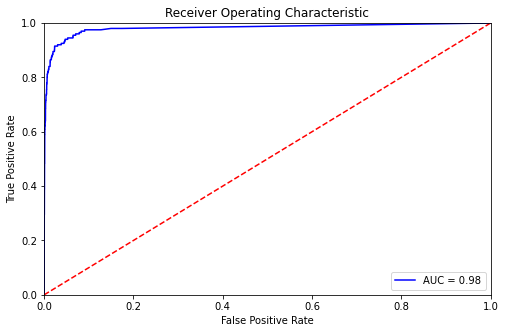

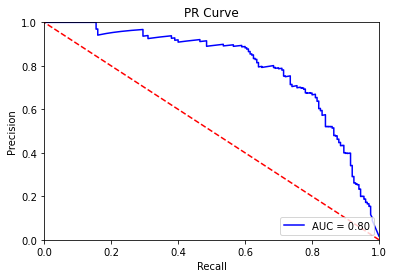

In [30]:
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
rf = RandomForestClassifier(random_state = 14 , max_depth = 25, min_samples_split = 5, n_estimators = 500)
param_grid = {
    
    'class_weight' : [{0 : 0.5 , 1 : 0.5 }, 
                     {0 : 0.4 , 1 : 0.6 } ,
                     {0 : 0.3 , 1 : 0.7},
                     {0: 0.2 , 1: 0.8} ,
                     {0 : 0.1 , 1 : 0.9},
                     {0 : 0.02 , 1 : 0.98},
                     {0 : 0.005 , 1: 0.995}]
    
}
parameter_tuning(model=rf, param_grid=param_grid, data=train_data_3 , n_features=n_features)

Perform Random Forest Classification with the selected features and parameters :  


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.999875
Train Accuracy using predicted labels :0.999875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11769    31]
 [   72   128]]


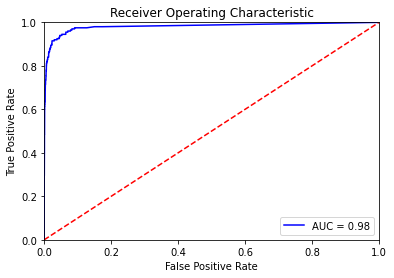

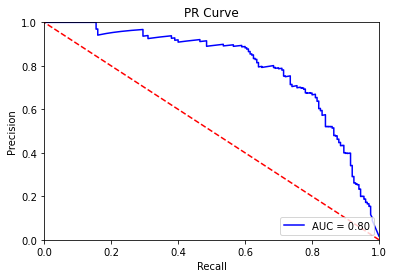

Total_cost of mis- classification : 36310


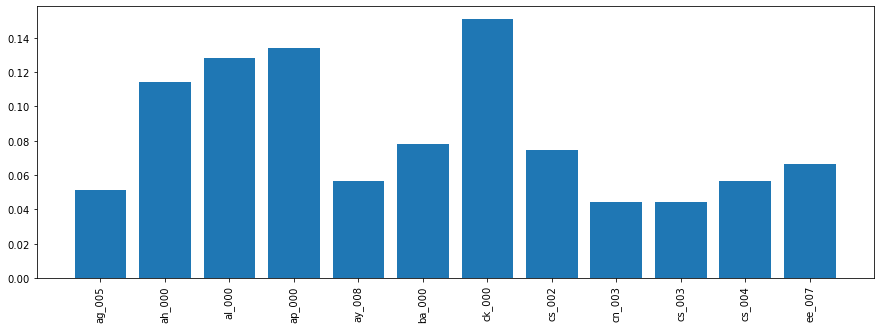

In [31]:
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


rf = RandomForestClassifier(random_state = 14 , class_weight = {0:0.4,1:0.6}, max_depth = 25, min_samples_split = 5, n_estimators = 500)
perform_classification(rf , X_train, X_validate, y_train, y_validate , 'rf')

Cross Validate:

[0.68041237 0.65841584 0.69767442 0.72154964 0.64450128]

 Avg AUC score for PR curve:0.6805107093798166
Confusion matrix :
[[58692   308]
 [  325   675]]
Total_cost of mis- classification : 165580


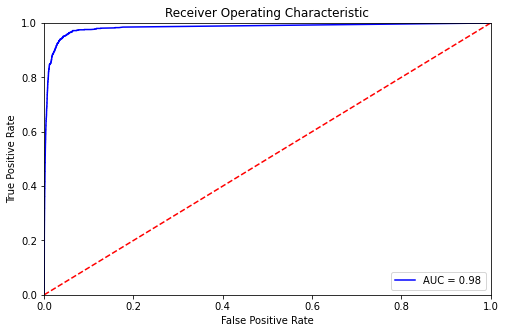

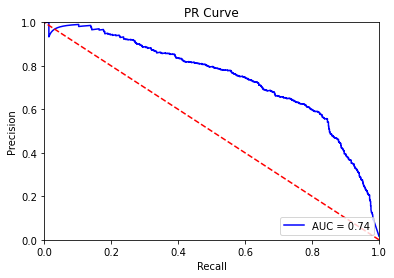

In [32]:
rf = RandomForestClassifier(random_state = 14 , class_weight = 'balanced', max_depth = 25, min_samples_split = 5, n_estimators = 500)
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
cross_validation(model=rf, data= train_data_3 , n_features= n_features )

[0.70381232 0.73295455 0.73099415 0.74157303 0.69642857]

 Avg AUC score for PR curve:0.7211525238706618
Confusion matrix :
[[58896   104]
 [  377   623]]
Total_cost of mis- classification : 189540


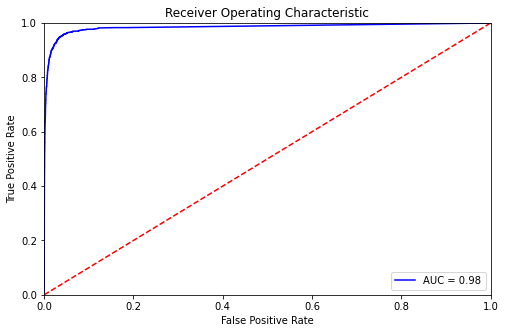

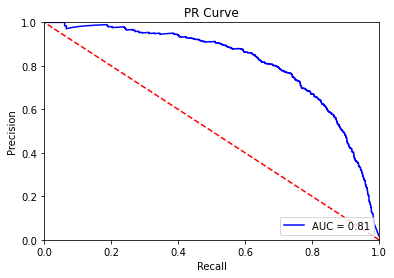

In [34]:
rf = RandomForestClassifier(random_state = 14 , class_weight = {0:0.4,1:0.}, max_depth = 25, min_samples_split = 5, n_estimators = 500)
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']
cross_validation(model=rf, data= train_data_3 , n_features= n_features )

Check the performance on test data :


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9949583333333333
Train Accuracy using predicted labels :0.9949583333333333
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.984
Confusion matrix with the predicted class  :
[[15506   119]
 [  133   242]]


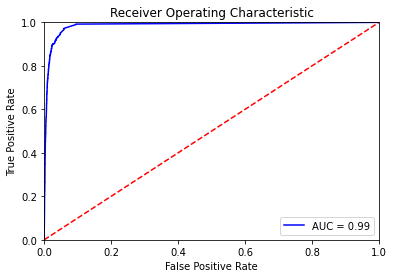

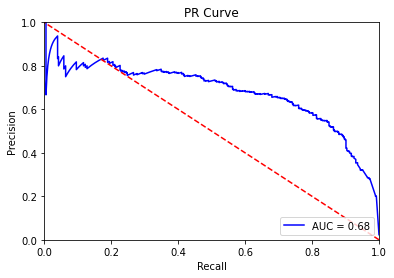

Total_cost of mis- classification : 67690


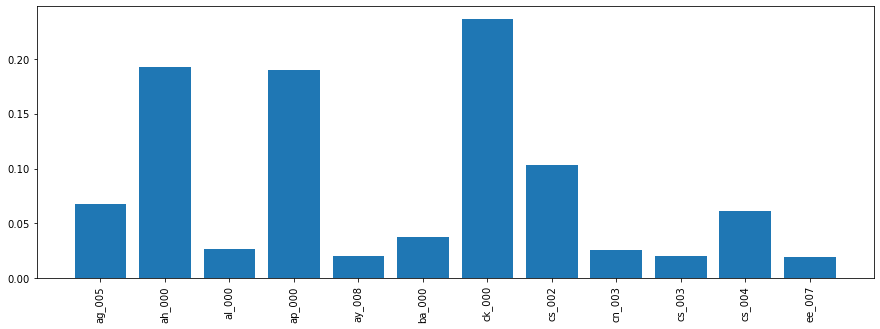

In [35]:
## Check the performance of the model on test data 
n_features = ['ag_005' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_008' , 'ba_000' , 'ck_000' , 'cs_002','cn_003','cs_003', 'cs_004','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


rf = RandomForestClassifier(class_weight = "balanced", random_state = 14, max_depth = 20)
perform_classification(rf , X_train, X_test, y_train, y_test , 'rf')


In [24]:
## save the results 
classifier.append('random_forest')
cost.append(67690)
auc_val.append(0.68)

##### GBT Classifier:


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

ag_003
ah_000
al_000
ap_000
ay_001
ay_005
ay_006
ck_000
ee_005
ee_007


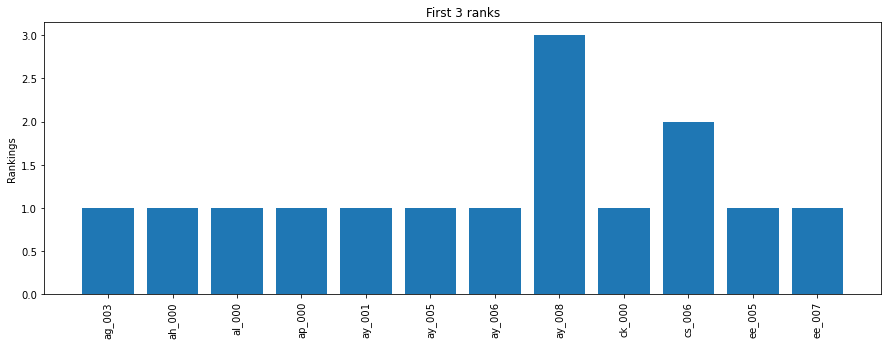

In [25]:
gbm = GradientBoostingClassifier(random_state = 14 )
feature_selection(model = gbm, data = train_data_3, cont_features = cont_features)

Perform GBM Classification with the selected features:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9941875
Train Accuracy using predicted labels :0.9941875
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.990
Confusion matrix with the predicted class  :
[[11759    41]
 [   78   122]]


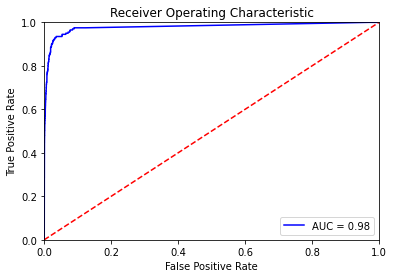

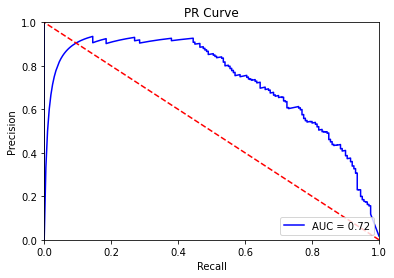

Total_cost of mis- classification : 39410


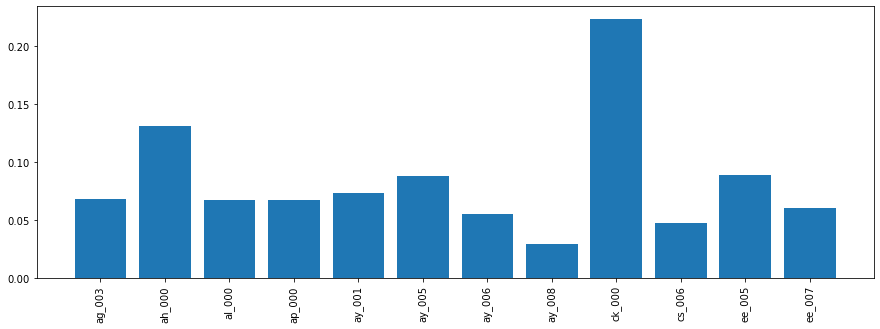

In [26]:
n_features = ['ag_003' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


gbm = GradientBoostingClassifier(random_state = 14 )
perform_classification(gbm , X_train, X_validate, y_train, y_validate , 'gbm')

Grid search GBM Classifier params


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 900}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix :
[[11752    48]
 [   62   138]]


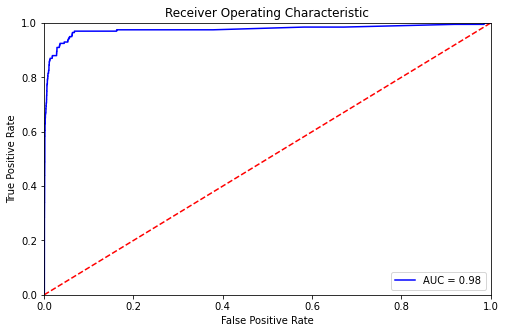

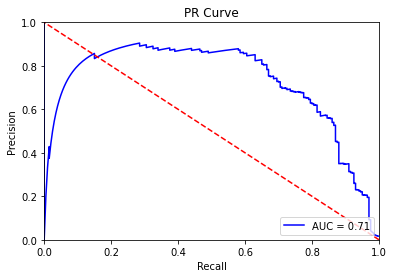

In [27]:
n_features = ['ag_003' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

gbm = GradientBoostingClassifier(random_state = 14 )
param_grid = {
    "max_depth" : [3,5],
    "learning_rate" : [0.1, 0.01, 1],
    "n_estimators" : [500,900]
}
parameter_tuning(model= gbm, param_grid=param_grid, data=train_data_3 , n_features=n_features)

Perform GBM Classification with the selected features and params:


 X_train : (48000, 12)

 X_test : (12000, 12)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.991
Confusion matrix with the predicted class  :
[[11752    48]
 [   62   138]]


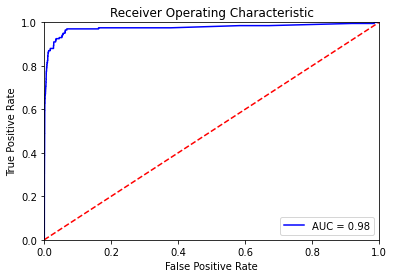

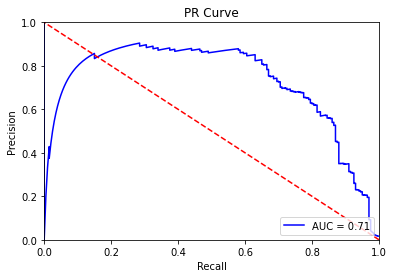

Total_cost of mis- classification : 31480


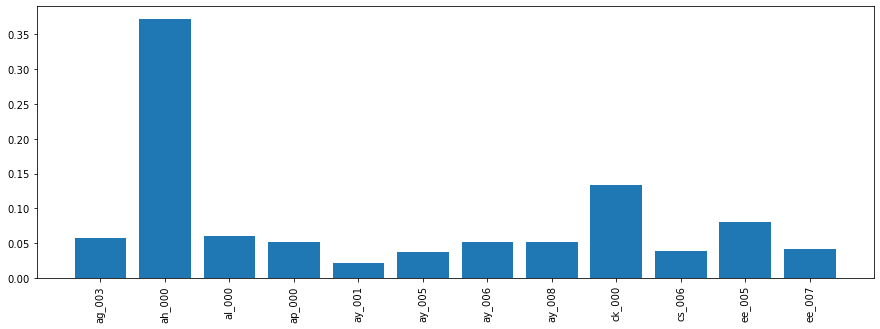

In [28]:
n_features = ['ag_003' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 900 )
perform_classification(gbm, X_train, X_validate, y_train, y_validate , 'gbm')

Cross Validate :

[0.75268817 0.76719577 0.76666667 0.77595628 0.67285383]

 Avg AUC score for PR curve:0.7470721436729428
Confusion matrix :
[[58803   197]
 [  290   710]]
Total_cost of mis- classification : 146970


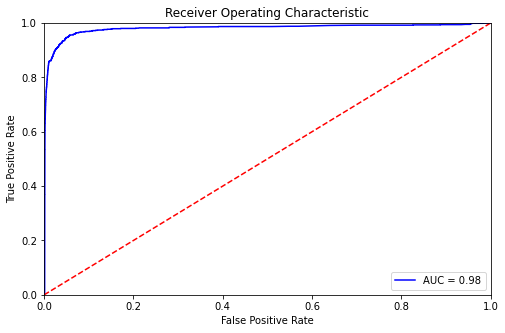

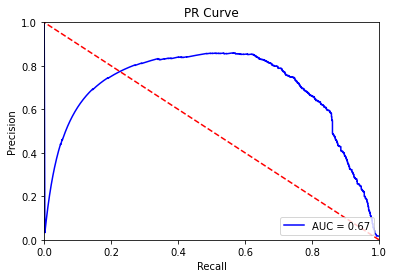

In [29]:
gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 900 )
n_features = ['ag_003' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']
cross_validation(model=gbm, data= train_data_3 , n_features= n_features )

Test on test data :


 X_train : (60000, 12)

 X_test : (16000, 12)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9999375
Train Accuracy using predicted labels :0.9999375
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.986
Confusion matrix with the predicted class  :
[[15579    46]
 [  171   204]]


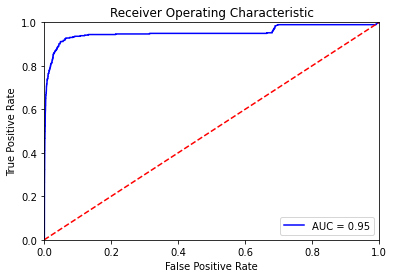

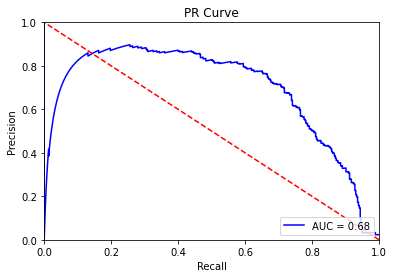

Total_cost of mis- classification : 85960


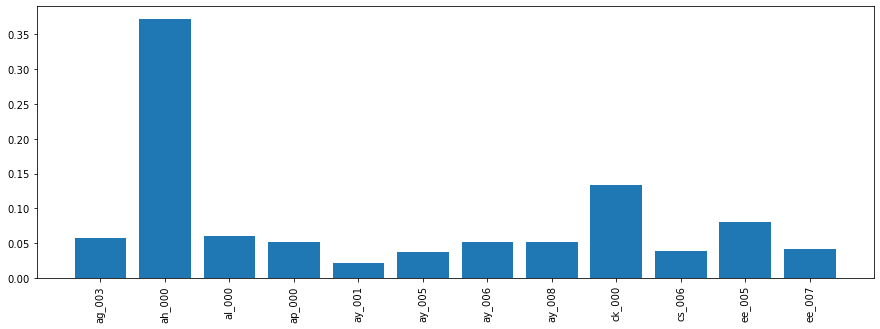

In [30]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ag_003' , 'ah_000' , 'al_000' , 'ap_000' , 'ay_001' , 'ay_005' ,'ay_006','ay_008', 'ck_000' , 'cs_006', 'ee_005', 'ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


gbm = GradientBoostingClassifier(random_state = 14 , max_depth = 5, learning_rate = 0.1, n_estimators = 900 )
perform_classification(gbm , X_train, X_test, y_train, y_test , 'gbm')


In [25]:
## save the results 
classifier.append('gbm')
cost.append(85960)
auc_val.append(0.68)

##### AdaBoost Classifier:


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)
Selected Features:

al_000
ap_000
ay_008
ba_006
ck_000
cn_003
cn_006
cs_004
cs_006
ee_007


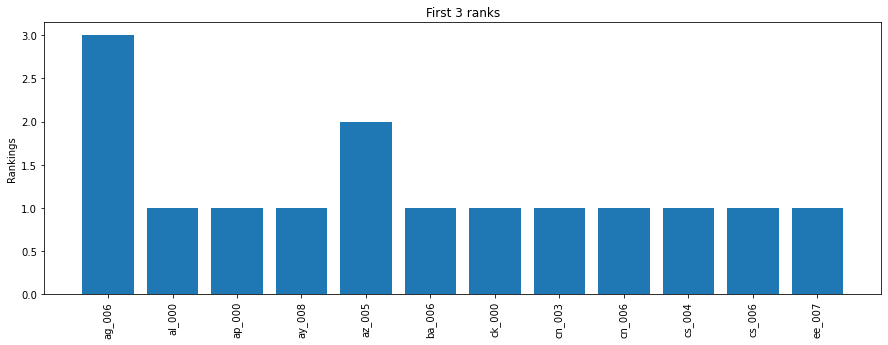

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 12)
feature_selection(model = ada, data = train_data_3, cont_features = cont_features)


 X_train : (48000, 13)

 X_test : (12000, 13)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.99025
Train Accuracy using predicted labels :0.99025
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix with the predicted class  :
[[11752    48]
 [   83   117]]


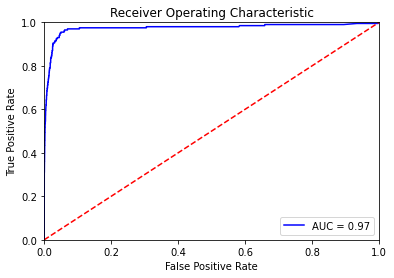

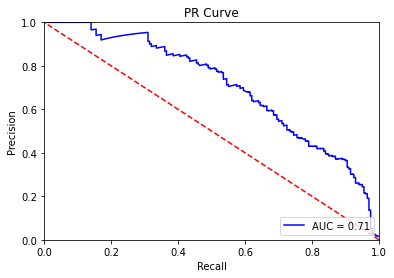

Total_cost of mis- classification : 41980


In [35]:
n_features = ['ap_000','ag_006' ,'al_000' , 'ay_008' , 'az_005' ,'ba_006', 'ck_000' ,'cn_003', 'cn_006','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


ada = AdaBoostClassifier( n_estimators = 100, random_state = 12)
perform_classification(ada, X_train, X_validate, y_train, y_validate , 'ada')


 X_train : (48000, 13)

 X_test : (12000, 13)

 y_train : (48000,)

 y_test : (12000,)
{'learning_rate': 1, 'n_estimators': 800}
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix :
[[11750    50]
 [   77   123]]


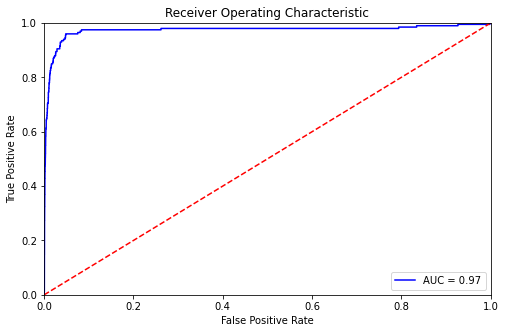

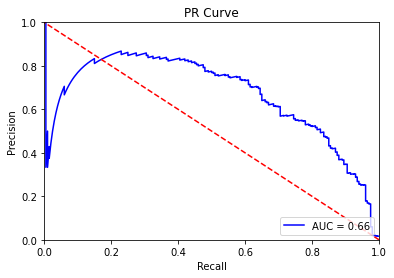

In [36]:
n_features = ['ap_000','ag_006' ,'al_000' , 'ay_008' , 'az_005' ,'ba_006', 'ck_000' ,'cn_003', 'cn_006','cs_004', 'cs_006','ee_005','ee_007']

ada = AdaBoostClassifier(random_state = 14 )
param_grid = {
    "n_estimators" : [100,400,800],
    "learning_rate" : [0.1, 0.01, 1]
    
}
parameter_tuning(model= ada, param_grid=param_grid, data=train_data_3 , n_features = n_features)


 X_train : (48000, 13)

 X_test : (12000, 13)

 y_train : (48000,)

 y_test : (12000,)

 Train Score : 0.9928958333333333
Train Accuracy using predicted labels :0.9928958333333333
Test set score using predicted labels: 0.99
Calculated Test set score: 0.99
Accuracy score :0.989
Confusion matrix with the predicted class  :
[[11750    50]
 [   77   123]]


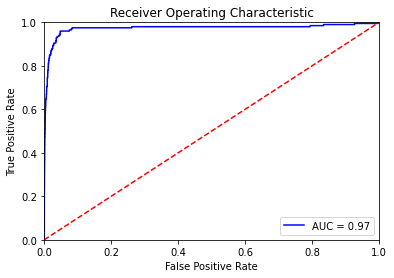

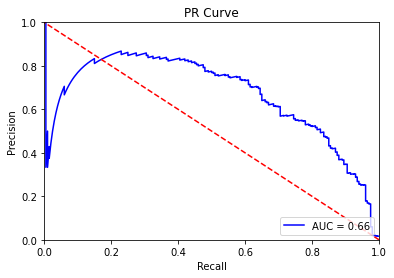

Total_cost of mis- classification : 39000


In [37]:
n_features = ['ap_000','ag_006' ,'al_000' , 'ay_008' , 'az_005' ,'ba_006', 'ck_000' ,'cn_003', 'cn_006','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


ada = AdaBoostClassifier( n_estimators = 800, random_state = 12, learning_rate = 1)
perform_classification(ada, X_train, X_validate, y_train, y_validate , 'ada')

Cross Validation :

[0.64130435 0.67605634 0.67045455 0.63888889 0.67032967]

 Avg AUC score for PR curve:0.6594067581054721
Confusion matrix :
[[58794   206]
 [  407   593]]
Total_cost of mis- classification : 205560


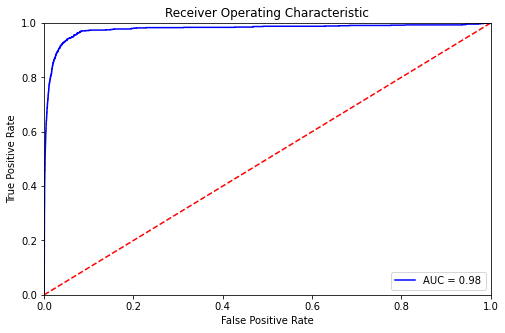

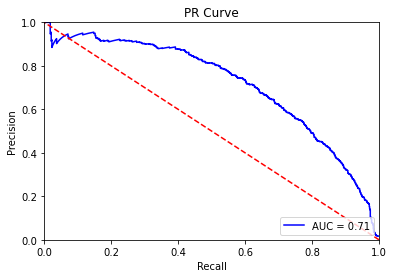

In [39]:
ada = AdaBoostClassifier(n_estimators = 800, random_state = 12, learning_rate = 1)
n_features = ['ap_000','ag_006' ,'al_000' , 'ay_008' , 'az_005' ,'ba_006', 'ck_000' ,'cn_003', 'cn_006','cs_004', 'cs_006','ee_005','ee_007']
cross_validation(model=ada, data= train_data_3 , n_features= n_features )

Check Model on Test data :


 X_train : (60000, 13)

 X_test : (16000, 13)

 y_train : (60000,)

 y_test : (16000,)

 Train Score : 0.9928958333333333
Train Accuracy using predicted labels :0.9928958333333333
Test set score using predicted labels: 0.98
Calculated Test set score: 0.98
Accuracy score :0.984
Confusion matrix with the predicted class  :
[[15554    71]
 [  179   196]]


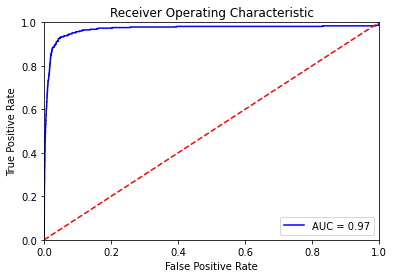

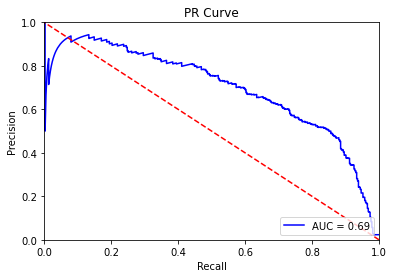

Total_cost of mis- classification : 90210


In [40]:
## Check the performance of the model on test data with 'balanced' weights.
n_features = ['ap_000','ag_006' ,'al_000' , 'ay_008' , 'az_005' ,'ba_006', 'ck_000' ,'cn_003', 'cn_006','cs_004', 'cs_006','ee_005','ee_007']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_3.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]
##
## make a copy of test
test1 = test_data_3.copy()
test1[n_features] = scaler.fit_transform(test1[n_features])
##
X_train = predictors
y_train = train1['label']
X_test = test1[n_features]
y_test = test1['label']
##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(predictors.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(train1['label'].shape))
print("\n y_test : {}".format(test1['label'].shape))
##


ada = AdaBoostClassifier(n_estimators = 800, random_state = 12, learning_rate = 1)
perform_classification(ada , X_train, X_test, y_train, y_test , 'ada')


In [26]:
## save the results 
classifier.append('ada')
cost.append(90210)
auc_val.append(0.69)

In [42]:
df = pd.DataFrame({"classifier" : classifier, "cost" :cost , "auc_val" :auc_val})
## save the results 
df.to_csv("Results_1.csv", index = False)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

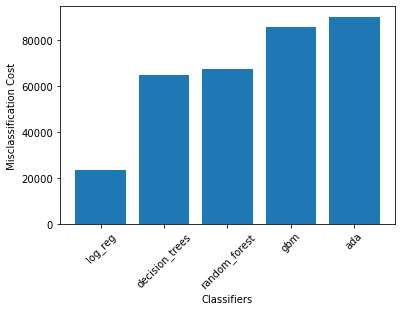

In [44]:
## Display the results 
df = df.sort_values(by = 'cost')
plt.bar(df['classifier'], df['cost'])
plt.xlabel("Classifiers")
plt.ylabel(" Misclassification Cost ")
plt.xticks(rotation = 45)

##### SVM Classifier :

In [22]:
from sklearn.utils import parallel_backend
from joblibspark import register_spark

In [23]:
register_spark()

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12 )

with parallel_backend('spark', n_jobs = 4):
    %time feature_selection(model = svm, data = train_data_3, cont_features = cont_features)


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)


In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12 )
%time feature_selection(model = svm, data = train_data_3, cont_features = cont_features)


 X_train : (48000, 32)

 X_validate : (12000, 32)

 y_train : (48000,)

 y_validate : (12000,)


Perform Classification with SVM and selected features :

In [ ]:
n_features = ['ag_003' , 'ag_005' , 'ag_006' , 'al_000' , 'ay_005' , 'ay_006' ,'ay_007','ay_008', 'ba_000', 'ck_000' , 'cs_004', 'ee_005']

## scale the continous variables.
scaler = StandardScaler()
## make a copy of train
train1 = train_data_1.copy()
train1[n_features] = scaler.fit_transform(train1[n_features])
##
predictors = train1[n_features]

##
X_train, X_validate, y_train, y_validate  = train_test_split(predictors, train1['label'] , random_state = 1 , test_size = 0.2, stratify = train1['label'])

print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_validate.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_validate.shape))
##


svm = SVC(kernel = 'linear', probability = True , class_weight = 'balanced', random_state = 12)
perform_classification(svm, X_train, X_validate, y_train, y_validate , 'svm')

Since SVM classification took a very very long time to execute and hence the execution had to be purged ,we will be unable to check its performance on this train data set.    

This analysis concludes with the graph which displays the various mis classification cost for each  of the classifier.Logistic Regression provides the least cost as shown.  